## Airline Customer Satisfaction Prediction

Given data about *airline customers*, let's try to predict if a given customer will be **satisfied with the airline.**

We will use logistic regression model to make our predictions, but first we will detect and remove outliers using z-scores.

Data source: https://www.kaggle.com/datasets/sjleshrac/airlines-customer-satisfaction

### Getting Started 

In [1]:
import numpy as np
import pandas as pd
import scipy.stats 
pd.set_option('display.max_columns', None)
pd.set_option('future.no_silent_downcasting', True)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('Invistico_Airline.csv')
data

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

### Preprocessing

In [4]:
df = data.copy()

In [5]:
# Fill missing arrival delay values with column mean
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [7]:
df.isna().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [8]:
{column: list(df[column].unique()) for column in df.select_dtypes('object').columns}

{'satisfaction': ['satisfied', 'dissatisfied'],
 'Gender': ['Female', 'Male'],
 'Customer Type': ['Loyal Customer', 'disloyal Customer'],
 'Type of Travel': ['Personal Travel', 'Business travel'],
 'Class': ['Eco', 'Business', 'Eco Plus']}

In [9]:
# Binary Encoding
df['Gender'] = df['Gender'].replace({
    'Female': 0, 
    'Male': 1
})

df['Customer Type'] = df['Customer Type'].replace({
    'disloyal Customer': 0, 
    'Loyal Customer': 1
})

df['Type of Travel'] = df['Type of Travel'].replace({
    'Personal Travel': 0, 
    'Business travel': 1
})

In [10]:
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,0,1,65,0,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,1,1,47,0,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,0,1,15,0,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,0,1,60,0,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,0,1,70,0,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,0,0,29,0,Eco,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,1,0,63,0,Business,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,1,0,69,0,Eco,2320,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,1,0,66,0,Eco,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205.0


In [11]:
# One hot encoding
flight_class_dummies = pd.get_dummies(df['Class'], prefix='Flight_class')
df = pd.concat([df, flight_class_dummies], axis=1)
df = df.drop('Class', axis=1)
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Flight_class_Business,Flight_class_Eco,Flight_class_Eco Plus
0,satisfied,0,1,65,0,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0,False,True,False
1,satisfied,1,1,47,0,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0,True,False,False
2,satisfied,0,1,15,0,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0,False,True,False
3,satisfied,0,1,60,0,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0,False,True,False
4,satisfied,0,1,70,0,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,0,0,29,0,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0.0,False,True,False
129876,dissatisfied,1,0,63,0,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172.0,True,False,False
129877,dissatisfied,1,0,69,0,2320,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,163.0,False,True,False
129878,dissatisfied,1,0,66,0,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205.0,False,True,False


### Outlier Detection

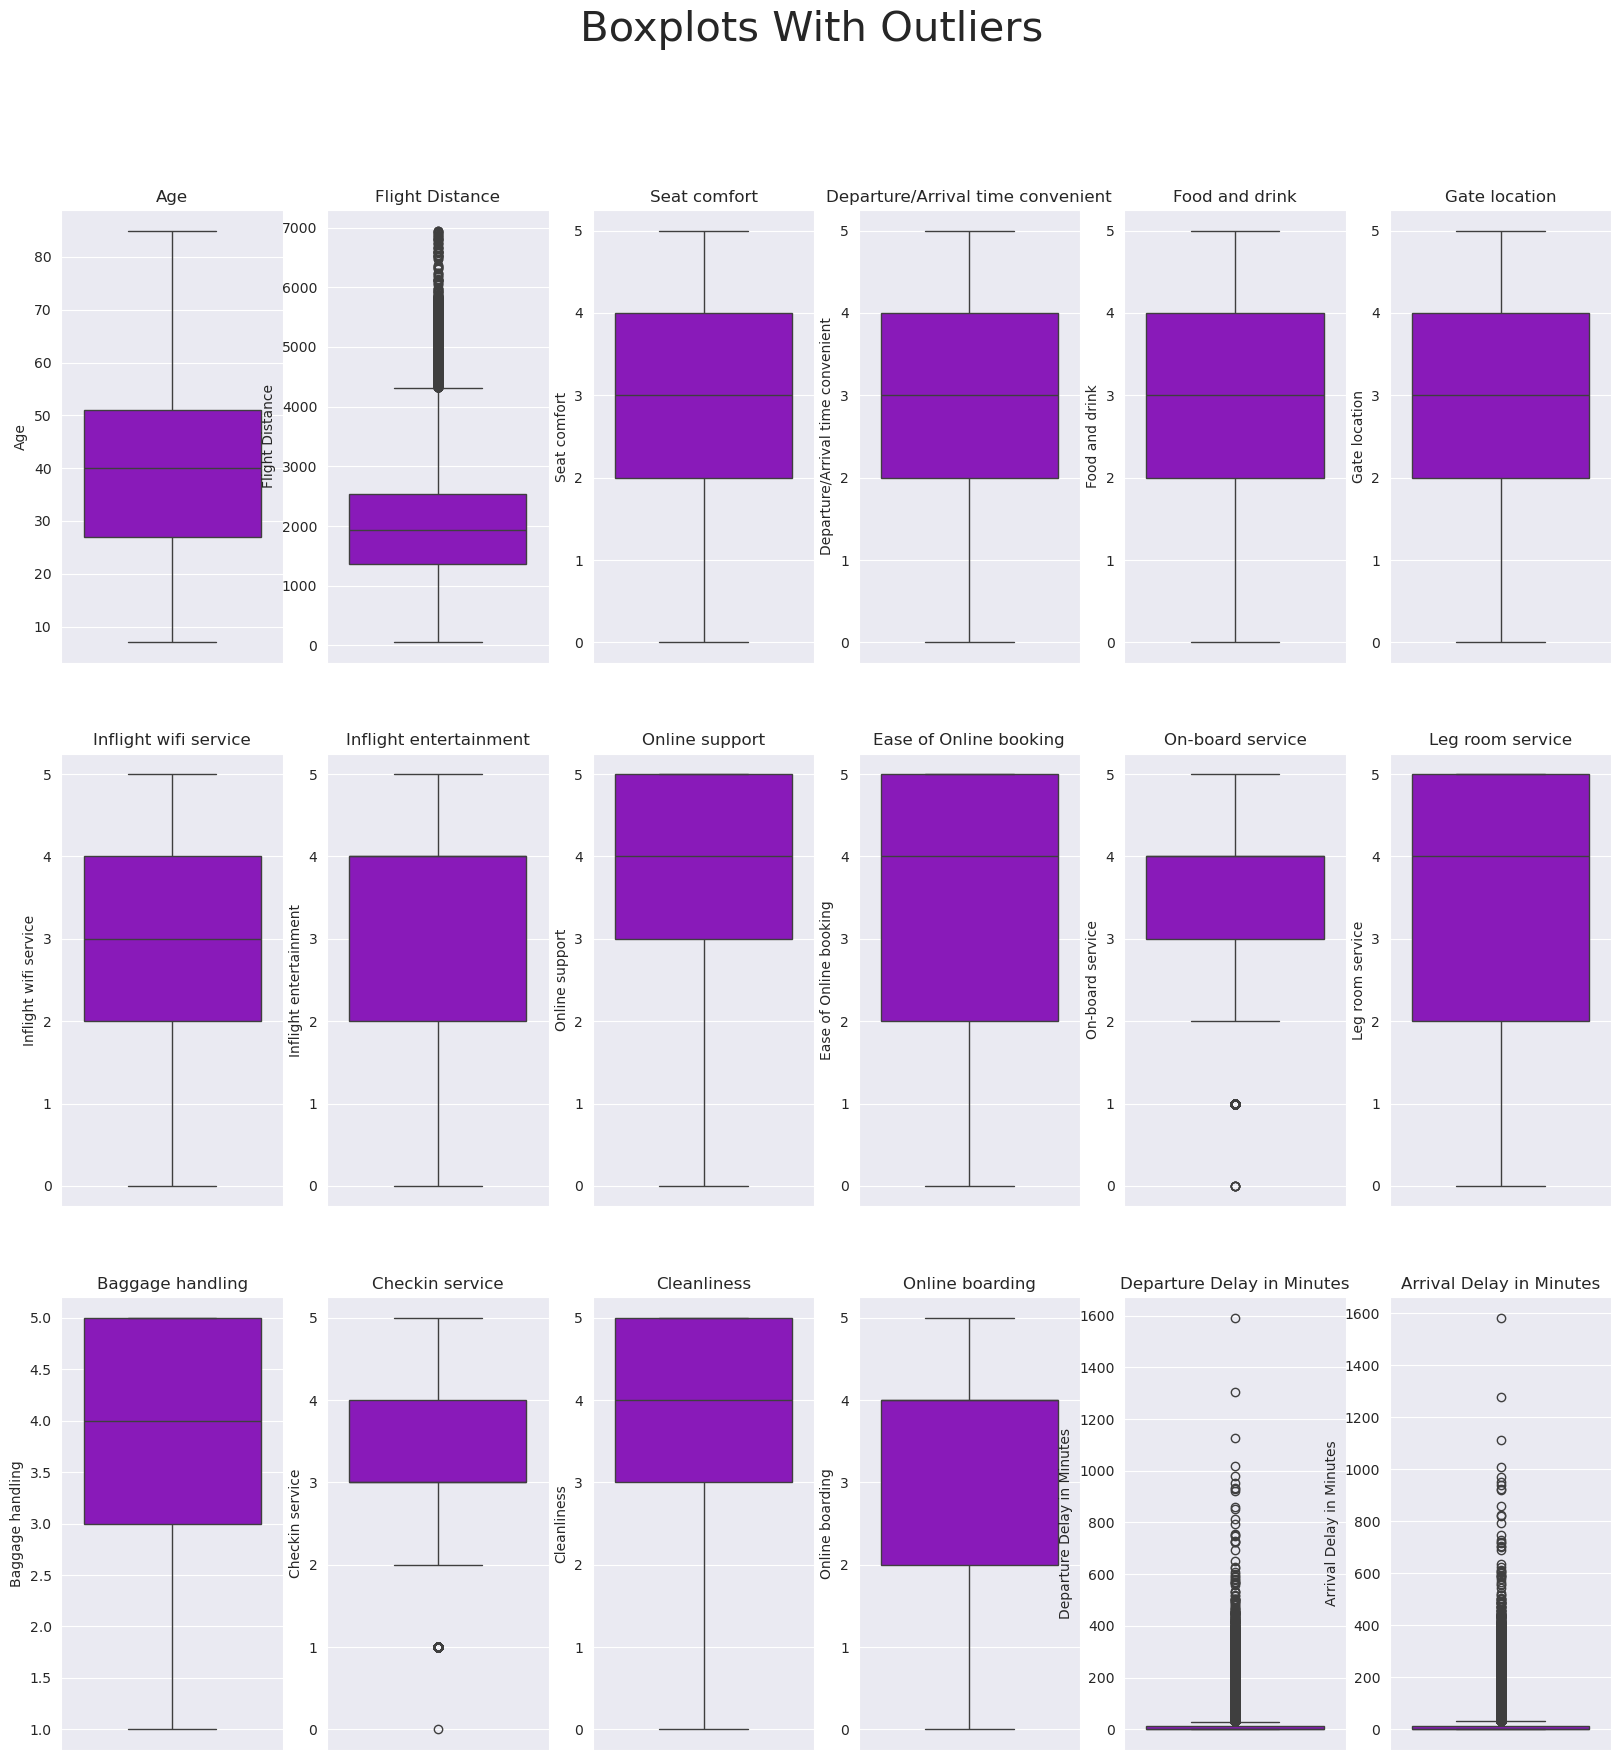

In [12]:
eda_df = df.drop('satisfaction', axis=1).copy()
nonbinary_columns = [column for column in eda_df.columns if len(eda_df[column].unique()) > 2]

plt.figure(figsize=(20, 20))

for i, column in enumerate(nonbinary_columns):
    plt.subplot(3, 6, i+1)
    sns.boxplot(data=eda_df[column], color='darkviolet')
    plt.title(column)
plt.suptitle("Boxplots With Outliers", size=30)
plt.show()

### Outlier Removal

In [13]:
pd.Series(scipy.stats.zscore(df['Departure Delay in Minutes'], axis=0))

0        -0.386481
1         7.756204
2        -0.386481
3        -0.386481
4        -0.386481
            ...   
129875   -0.386481
129876    4.183929
129877    3.684862
129878    4.682997
129879    4.472863
Name: Departure Delay in Minutes, Length: 129880, dtype: float64

In [14]:
threshold = 0.95

In [15]:
1 - threshold / 2

0.525

In [16]:
scipy.stats.norm.ppf(q = (threshold/2), loc = 0, scale=1)

-0.06270677794321385

In [17]:
scipy.stats.norm.ppf(q = 1 - (threshold/2), loc = 0, scale=1)

0.06270677794321385

In [101]:
# Removing outliers
threshold=0.07
columns=[
    'On-board service',
    'Checkin service',
    'Departure Delay in Minutes',
    'Arrival Delay in Minutes'
    ]

In [102]:
df1 = df.copy()

# Calculate the lower and upper bounds of the Z distribution given a threshold value
lower_bound = scipy.stats.norm.ppf(q=(threshold/2), loc=0, scale=1)
upper_bound = scipy.stats.norm.ppf(q=1-(threshold/2), loc=0, scale=1)

# Calculate z-scores of every example in the columns specified
outlier_df = df1.loc[:, columns].copy()
zscores = pd.DataFrame(scipy.stats.zscore(outlier_df, axis=0), index=outlier_df.index, columns=outlier_df.columns)

# Get boolean arrays denoting the outlier examples
lower_outliers = (zscores < lower_bound).any(axis=1)
upper_outliers = (zscores >= upper_bound).any(axis=1)

# Get indices of all outlier examples
outliers = df1[pd.concat([lower_outliers, upper_outliers], axis=1).any(axis=1)].index

# Drop the outliers
df1 = df1.drop(outliers, axis=0).reset_index(drop=True)
print(len(outliers), "examples dropped.")

30738 examples dropped.


In [103]:
outliers_df = df1.copy()
outliers_df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Flight_class_Business,Flight_class_Eco,Flight_class_Eco Plus
0,satisfied,0,1,65,0,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.000000,False,True,False
1,satisfied,0,1,15,0,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.000000,False,True,False
2,satisfied,0,1,70,0,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.000000,False,True,False
3,satisfied,1,1,30,0,1894,0,0,0,3,2,0,2,2,5,4,5,5,4,2,0,0.000000,False,True,False
4,satisfied,0,1,66,0,227,0,0,0,3,2,5,5,5,5,0,5,5,5,3,17,15.000000,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99137,satisfied,0,0,35,0,3287,5,4,5,3,2,5,2,2,4,5,4,4,3,2,9,0.000000,False,True,False
99138,satisfied,0,0,69,0,2240,5,4,5,3,4,5,4,4,5,4,4,3,4,4,4,0.000000,False,True,False
99139,satisfied,0,0,63,0,1942,5,5,4,4,3,4,3,3,5,2,5,3,5,3,7,15.091129,False,True,False
99140,satisfied,0,0,11,0,2752,5,5,5,2,2,5,2,2,3,5,3,5,4,2,5,0.000000,False,True,False


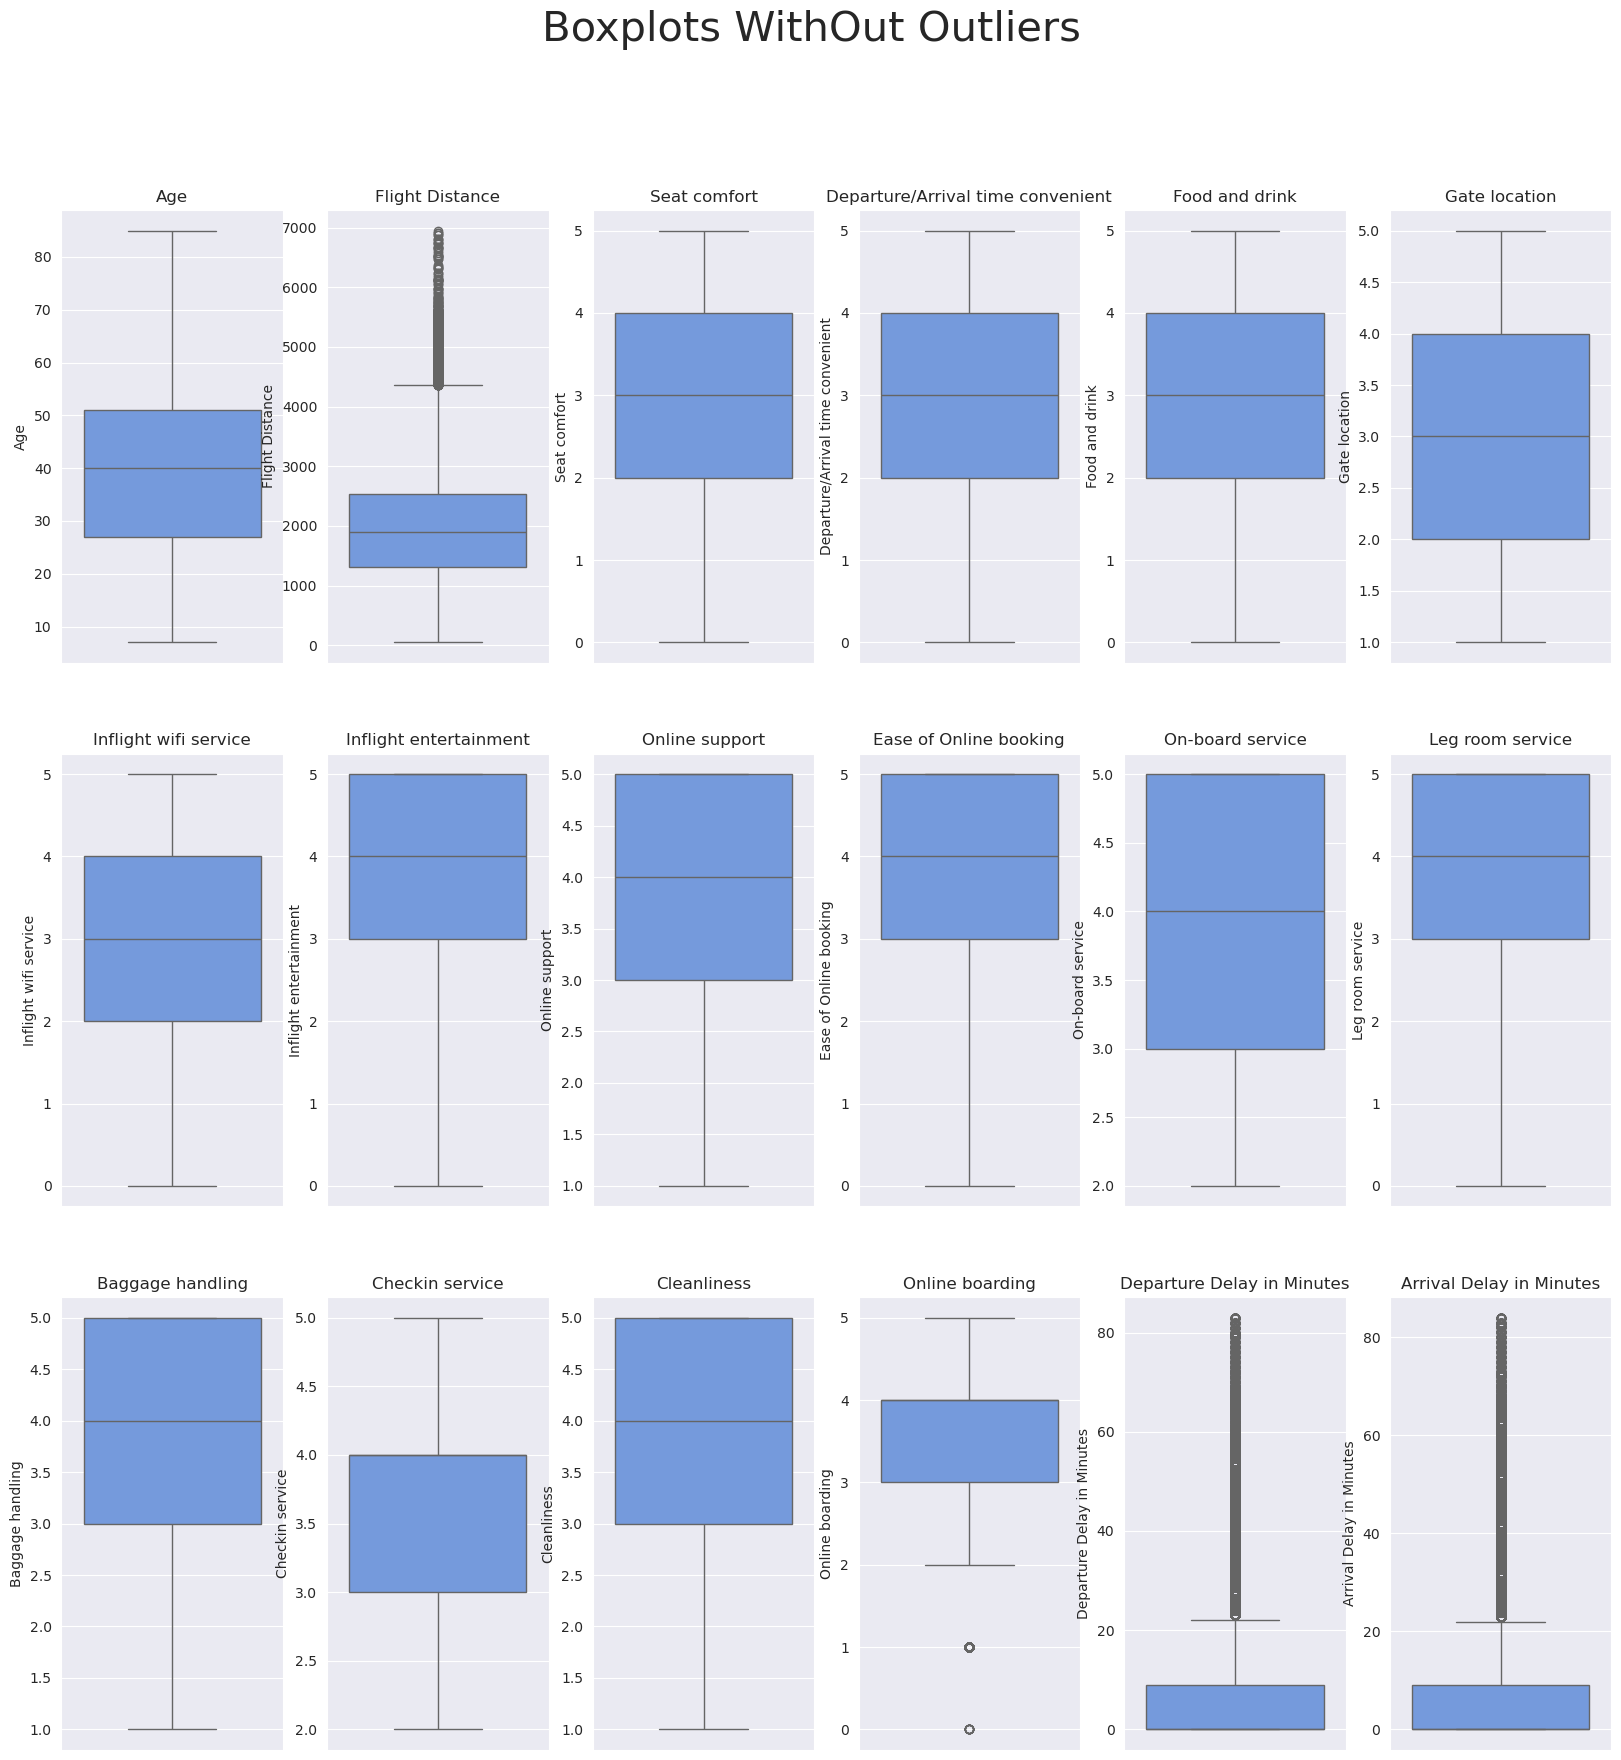

In [104]:
# Let's show the box plots 
plt.figure(figsize=(20, 20))

for i, column in enumerate(nonbinary_columns):
    plt.subplot(3, 6, i+1)
    sns.boxplot(data=outliers_df[column], color='cornflowerblue')
    plt.title(column)
plt.suptitle("Boxplots WithOut Outliers", size=30)
plt.show()

### Finalizing Model Inputs

#### Training with out Outlier Removal (baseline model)

In [105]:
# Split df into X and y
y = df['satisfaction']
X = df.drop('satisfaction', axis=1)

# Train-test split
X_train1, X_test1 = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Scale X
scaler = StandardScaler()
scaler.fit(X_train1)
X_train1 = pd.DataFrame(scaler.transform(X_train1), index=X_train1.index, columns=X_train1.columns)
X_test1 = pd.DataFrame(scaler.transform(X_test1), index=X_test1.index, columns=X_test1.columns)

In [106]:
X_train1

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Flight_class_Business,Flight_class_Eco,Flight_class_Eco Plus
118802,-0.986865,0.474135,1.298138,0.666561,1.009977,-0.603668,-0.650125,-0.590875,-0.759576,-0.191235,1.198968,1.132109,1.170042,1.210086,1.171971,1.128937,-0.271564,1.123895,-0.274140,-0.383751,0.047685,1.041606,-0.901038,-0.27914
6520,1.013310,0.474135,-1.483560,-1.500238,-0.472891,-1.321403,1.316254,-1.283215,-0.759576,0.567861,-1.771185,-1.167966,0.403349,-1.937144,-1.146083,-0.600978,1.314963,-1.480635,0.496681,-0.383751,-0.390756,-0.960056,1.109831,-0.27914
9871,-0.986865,0.474135,0.105982,-1.500238,-0.766538,0.831803,0.660795,0.101464,0.007007,0.567861,0.456430,0.365418,0.403349,-0.363529,1.171971,-2.330893,-1.064828,1.123895,0.496681,-0.383751,-0.390756,-0.960056,1.109831,-0.27914
94060,1.013310,0.474135,0.966984,0.666561,-0.209487,-1.321403,-1.305584,-1.283215,-1.526159,-0.950332,0.456430,1.132109,0.403349,0.423278,0.399286,0.263980,-0.271564,0.255718,1.267503,-0.383751,-0.390756,1.041606,-0.901038,-0.27914
21294,-0.986865,0.474135,-1.218636,-1.500238,0.672430,-1.321403,-1.305584,-1.283215,-1.526159,1.326958,-1.771185,-1.934658,1.170042,1.210086,1.171971,0.263980,1.314963,1.123895,1.267503,1.408357,0.872986,-0.960056,1.109831,-0.27914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98047,-0.986865,0.474135,-0.821251,0.666561,3.121114,-1.321403,-1.305584,-1.283215,-1.526159,0.567861,0.456430,0.365418,0.403349,-1.150337,-1.146083,0.263980,-0.271564,-0.612458,0.496681,-0.383751,-0.390756,1.041606,-0.901038,-0.27914
5192,1.013310,0.474135,1.033215,-1.500238,-0.260217,-1.321403,0.660795,-1.283215,0.773589,1.326958,-1.771185,1.132109,1.170042,0.423278,1.171971,0.263980,-0.271564,0.255718,1.267503,-0.383751,-0.390756,-0.960056,1.109831,-0.27914
77708,1.013310,0.474135,1.231908,0.666561,-1.705038,0.114067,1.316254,1.486144,1.540172,1.326958,0.456430,-0.401274,-1.130036,-1.150337,-1.146083,-0.600978,-1.064828,-1.480635,-1.044962,-0.331805,-0.236012,1.041606,-0.901038,-0.27914
98539,1.013310,0.474135,0.900753,0.666561,0.746573,0.114067,0.005335,-0.590875,0.007007,-0.191235,0.456430,1.132109,0.403349,0.423278,0.399286,0.263980,1.314963,0.255718,0.496681,0.759043,0.511917,1.041606,-0.901038,-0.27914


In [107]:
y_train1

118802       satisfied
6520      dissatisfied
9871         satisfied
94060        satisfied
21294        satisfied
              ...     
98047        satisfied
5192      dissatisfied
77708     dissatisfied
98539        satisfied
128037       satisfied
Name: satisfaction, Length: 90916, dtype: object

In [108]:
model1 = LogisticRegression()
model1.fit(X_train1, y_train1)

print("Test Accuracy: {:.3f}%".format(model1.score(X_test1, y_test1)*100))

Test Accuracy: 83.611%


#### Training With Outlier Removal

In [109]:
# Split df into X and y
y = outliers_df['satisfaction']
X = outliers_df.drop('satisfaction', axis=1)

# Train-test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Scale X
scaler = StandardScaler()
scaler.fit(X_train2)
X_train2 = pd.DataFrame(scaler.transform(X_train2), index=X_train2.index, columns=X_train2.columns)
X_test2 = pd.DataFrame(scaler.transform(X_test2), index=X_test2.index, columns=X_test2.columns)

In [110]:
X_train2

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Flight_class_Business,Flight_class_Eco,Flight_class_Eco Plus
3384,1.03292,0.458431,1.818223,-1.470806,-0.027707,-1.343849,0.628618,-1.290782,0.017332,0.539659,-1.875487,0.290495,0.315662,-0.805797,1.135113,0.115023,1.337942,0.096766,0.438927,-0.317776,-0.523246,-1.043978,1.187197,-0.260306
12671,1.03292,0.458431,1.884878,-1.470806,-0.585266,-0.631176,1.278861,-1.980445,0.017332,0.539659,-2.624226,0.290495,0.315662,1.204756,-1.324118,1.057795,0.308702,0.096766,0.438927,-0.512271,-0.523246,-1.043978,1.187197,-0.260306
1949,1.03292,0.458431,0.151836,-1.470806,1.639112,-1.343849,-0.021625,-1.290782,0.773837,1.307459,-1.875487,1.066748,1.121556,0.199479,1.135113,0.115023,-0.720537,-0.862312,1.224757,-0.512271,-0.523246,-1.043978,1.187197,-0.260306
98762,1.03292,0.458431,-0.248096,0.679899,0.281831,0.794169,0.628618,0.778208,0.773837,1.307459,0.370728,1.066748,1.121556,1.204756,1.135113,1.057795,-0.720537,1.055844,1.224757,-0.512271,-0.523246,0.957874,-0.842320,-0.260306
15148,1.03292,0.458431,-1.847827,-1.470806,0.207620,-0.631176,1.278861,-0.601119,0.773837,-0.995942,-1.126749,-1.262011,-1.296126,0.199479,-1.324118,1.057795,1.337942,0.096766,-1.132732,1.756828,2.266477,-1.043978,1.187197,-0.260306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50057,1.03292,0.458431,0.951702,0.679899,1.346174,-1.343849,-1.972354,-1.980445,-0.739172,0.539659,-1.875487,0.290495,0.315662,-0.805797,-1.324118,-2.713294,-1.749777,-1.821391,0.438927,0.200875,-0.523246,-1.043978,1.187197,-0.260306
98047,-0.96813,0.458431,1.018357,0.679899,-0.116565,0.081496,-0.021625,0.088544,0.017332,-0.228142,1.119466,1.066748,1.121556,1.204756,1.135113,1.057795,-0.720537,1.055844,1.224757,-0.512271,-0.523246,0.957874,-0.842320,-0.260306
5192,-0.96813,0.458431,-1.781172,-1.470806,0.349207,1.506842,1.278861,1.467871,1.530341,1.307459,1.119466,0.290495,-0.490232,-0.805797,-0.504374,-0.827750,-0.720537,-0.862312,-0.346902,-0.512271,-0.523246,-1.043978,1.187197,-0.260306
77708,1.03292,0.458431,-0.714684,0.679899,-0.288422,-0.631176,-0.671868,-0.601119,-0.739172,0.539659,0.370728,0.290495,0.315662,1.204756,1.135113,0.115023,-0.720537,0.096766,0.438927,0.200875,-0.523246,0.957874,-0.842320,-0.260306


In [111]:
y_train2

3384     dissatisfied
12671    dissatisfied
1949     dissatisfied
98762       satisfied
15148    dissatisfied
             ...     
50057    dissatisfied
98047       satisfied
5192        satisfied
77708       satisfied
98539       satisfied
Name: satisfaction, Length: 69399, dtype: object

In [112]:
model2 = LogisticRegression()
model2.fit(X_train2, y_train2)
print("Test Accuracy: {:.3f}%".format(model2.score(X_test2, y_test2)*100))

Test Accuracy: 84.511%
